In [32]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
from glob import glob
import math
import plotly.express as px
import re

import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [33]:
# Year evaluated
year = '2023'

# Country evaluated
country_traced = 'FR'  #  'DE'  'CH'  'FR'

# Load data

In [34]:
matrix_connections=pd.read_csv(r"./Input/Physical flow/"+year+"_allData.csv", index_col=0)
matrix_connections.index = pd.to_datetime(matrix_connections.index)
matrix_connections

BE>FR [MW]  BE>DE [MW]  BE>LU [MW]  BE>NL [MW]  \
2023-01-01 00:00:00+00:00      3918.0      587.00        0.00         0.0   
2023-01-01 01:00:00+00:00      4227.0       74.50       74.50         0.0   
2023-01-01 02:00:00+00:00      3614.0      133.50      133.50        27.0   
2023-01-01 03:00:00+00:00      3858.0      143.50      143.50        97.0   
2023-01-01 04:00:00+00:00      3685.0      119.25      119.25         0.0   
...                               ...         ...         ...         ...   
2023-12-31 19:00:00+00:00         0.0       14.50       14.50      1709.0   
2023-12-31 20:00:00+00:00        60.5        3.75        3.75      1579.0   
2023-12-31 21:00:00+00:00       515.0       97.75        0.00       819.0   
2023-12-31 22:00:00+00:00       832.0        0.00        0.00       934.0   
2023-12-31 23:00:00+00:00       975.5        0.00        0.00       676.0   

                           BE>UK [MW]  FR>BE [MW]  FR>DE [MW]  FR>IT [MW]  \
2023-01-01 00:00:00+00:00       258.0        0.00         0.0         0.0   
2023-01-01 01:00:00+00:00       259.0        0.00         0.0         0.0   
2023-01-01 02:00:00+00:00       258.0        0.00         0.0        33.0   
2023-01-01 03:00:00+00:00       258.0        0.00         0.0         6.0   
2023-01-01 04:00:00+00:00       251.0        0.00         0.0         0.0   
...                               ...         ...         ...         ...   
2023-12-31 19:00:00+00:00      1045.0      319.75      3282.0      1792.0   
2023-12-31 20:00:00+00:00      1045.0        0.00      3110.0      1605.0   
2023-12-31 21:00:00+00:00      1024.0        0.00      1970.0      1508.0   
2023-12-31 22:00:00+00:00      1024.0        0.00      1587.0      1202.0   
2023-12-31 23:00:00+00:00      1024.0        0.00      1207.0      1074.0   

                           FR>ES [MW]  FR>CH [MW]  ...  PL>DE [MW]  \
2023-01-01 00:00:00+00:00     2631.00         0.0  ...         0.0   
2023-01-01 01:00:00+00:00     2408.00         0.0  ...         0.0   
2023-01-01 02:00:00+00:00     2540.00       606.0  ...         0.0   
2023-01-01 03:00:00+00:00     2927.00       740.0  ...         0.0   
2023-01-01 04:00:00+00:00     3092.00       567.0  ...         0.0   
...                               ...         ...  ...         ...   
2023-12-31 19:00:00+00:00     2992.25      2653.0  ...         0.0   
2023-12-31 20:00:00+00:00     2904.75      2654.0  ...         0.0   
2023-12-31 21:00:00+00:00     2849.50      2320.0  ...         0.0   
2023-12-31 22:00:00+00:00     2963.25      1995.0  ...         0.0   
2023-12-31 23:00:00+00:00     2658.75      1611.0  ...         0.0   

                           PL>SE [MW]  SE>DK [MW]  SE>DE [MW]  SE>NO [MW]  \
2023-01-01 00:00:00+00:00         7.0         0.0         0.0      3009.0   
2023-01-01 01:00:00+00:00         0.0         0.0         0.0      3356.0   
2023-01-01 02:00:00+00:00         0.0         0.0         0.0      3278.0   
2023-01-01 03:00:00+00:00         0.0         0.0         0.0      3052.0   
2023-01-01 04:00:00+00:00         0.0         0.0         0.0      3181.0   
...                               ...         ...         ...         ...   
2023-12-31 19:00:00+00:00       314.0         0.0         0.0      2376.0   
2023-12-31 20:00:00+00:00       585.0         0.0         0.0      1947.0   
2023-12-31 21:00:00+00:00       592.0         0.0         0.0      2050.0   
2023-12-31 22:00:00+00:00       537.0         0.0         0.0      1946.0   
2023-12-31 23:00:00+00:00       594.0         0.0         0.0      1841.0   

                           SE>PL [MW]  ME>IT [MW]  MT>IT [MW]  HR>SI [MW]  \
2023-01-01 00:00:00+00:00         0.0       590.0         0.0         7.0   
2023-01-01 01:00:00+00:00         0.0       590.0         1.0       130.0   
2023-01-01 02:00:00+00:00         0.0       452.0         0.0       128.0   
2023-01-01 03:00:00+00:00         0.0         1.0         0.0       220.0   
2023-01-01 04:00:00+00:00 

In [35]:
# Full the raw list of connections
list_countries = matrix_connections.columns
list_countries = list_countries.to_numpy()
list_countries = [re.split(' \[MW\]|>', string)[0:2] for string in list_countries]
list_countries = np.array(list_countries).reshape(np.shape(list_countries)[0], 2)

# Get the list of unique countries
list_countries_unique = np.unique(list_countries)

# Get the connection list (sorted per country)
list_connections = pd.Series(index=list_countries_unique).astype(object)
for i in list_countries_unique:
    list_connections[i] = list(list_countries[list_countries[:, 0] == i][:,1])
list_connections
# for the selected country
# list_countries[list_countries[:, 0] == country_traced][:,1]

AT                            [CZ, DE, IT, SI, CH]
BE                            [FR, DE, LU, NL, UK]
CH                                [AT, IT, FR, DE]
CZ                                    [AT, DE, PL]
DE    [AT, BE, CZ, FR, NL, PL, SE, CH, LU, NO, DK]
DK                                [DE, NL, NO, SE]
ES                                        [FR, PT]
FR                        [BE, DE, IT, ES, CH, UK]
GR                                            [IT]
HR                                            [SI]
IE                                            [UK]
IT                    [AT, FR, GR, MT, ME, SI, CH]
LU                                        [BE, DE]
ME                                            [IT]
MT                                            [IT]
NL                            [BE, DK, DE, NO, UK]
NO                            [DK, DE, NL, SE, UK]
PL                                    [CZ, DE, SE]
PT                                            [ES]
SE                             

In [36]:
list_connections[country_traced]

['BE', 'DE', 'IT', 'ES', 'CH', 'UK']

In [57]:
i = country_traced
raw_exported = matrix_connections.loc[:,[i+'>'+j+' [MW]' for j in list_connections[i]]]
raw_imported = matrix_connections.loc[:,[j+'>'+i+' [MW]' for j in list_connections[i]]]

BE      DE      IT       ES      CH      UK 
2023-01-01 00:00:00+00:00    0.00     0.0     0.0  2631.00     0.0  2563.0
2023-01-01 01:00:00+00:00    0.00     0.0     0.0  2408.00     0.0  2562.0
2023-01-01 02:00:00+00:00    0.00     0.0    33.0  2540.00   606.0  2563.0
2023-01-01 03:00:00+00:00    0.00     0.0     6.0  2927.00   740.0  2555.0
2023-01-01 04:00:00+00:00    0.00     0.0     0.0  3092.00   567.0  2360.0
...                           ...     ...     ...      ...     ...     ...
2023-12-31 19:00:00+00:00  319.75  3282.0  1792.0  2992.25  2653.0  3051.0
2023-12-31 20:00:00+00:00    0.00  3110.0  1605.0  2904.75  2654.0  3050.0
2023-12-31 21:00:00+00:00    0.00  1970.0  1508.0  2849.50  2320.0  2936.0
2023-12-31 22:00:00+00:00    0.00  1587.0  1202.0  2963.25  1995.0  2145.0
2023-12-31 23:00:00+00:00    0.00  1207.0  1074.0  2658.75  1611.0  1479.0

[8760 rows x 6 columns]

# Plot the data

In [41]:
raw_exported.sum(axis=1).resample('D').mean()

2023-01-01 00:00:00+00:00     8084.208333
2023-01-02 00:00:00+00:00     8347.208333
2023-01-03 00:00:00+00:00     9348.541667
2023-01-04 00:00:00+00:00     9034.541667
2023-01-05 00:00:00+00:00     8972.208333
                                 ...     
2023-12-27 00:00:00+00:00    11826.979167
2023-12-28 00:00:00+00:00     9956.947917
2023-12-29 00:00:00+00:00     9752.291667
2023-12-30 00:00:00+00:00    12914.447917
2023-12-31 00:00:00+00:00    14576.666667
Freq: D, Length: 365, dtype: float64

In [42]:
raw_imported.sum(axis=1).resample('D').mean()

2023-01-01 00:00:00+00:00    4180.541667
2023-01-02 00:00:00+00:00    2101.666667
2023-01-03 00:00:00+00:00    1921.083333
2023-01-04 00:00:00+00:00    2504.625000
2023-01-05 00:00:00+00:00    3170.625000
                                ...     
2023-12-27 00:00:00+00:00     733.541667
2023-12-28 00:00:00+00:00    1825.572917
2023-12-29 00:00:00+00:00    1457.635417
2023-12-30 00:00:00+00:00     752.093750
2023-12-31 00:00:00+00:00     165.666667
Freq: D, Length: 365, dtype: float64

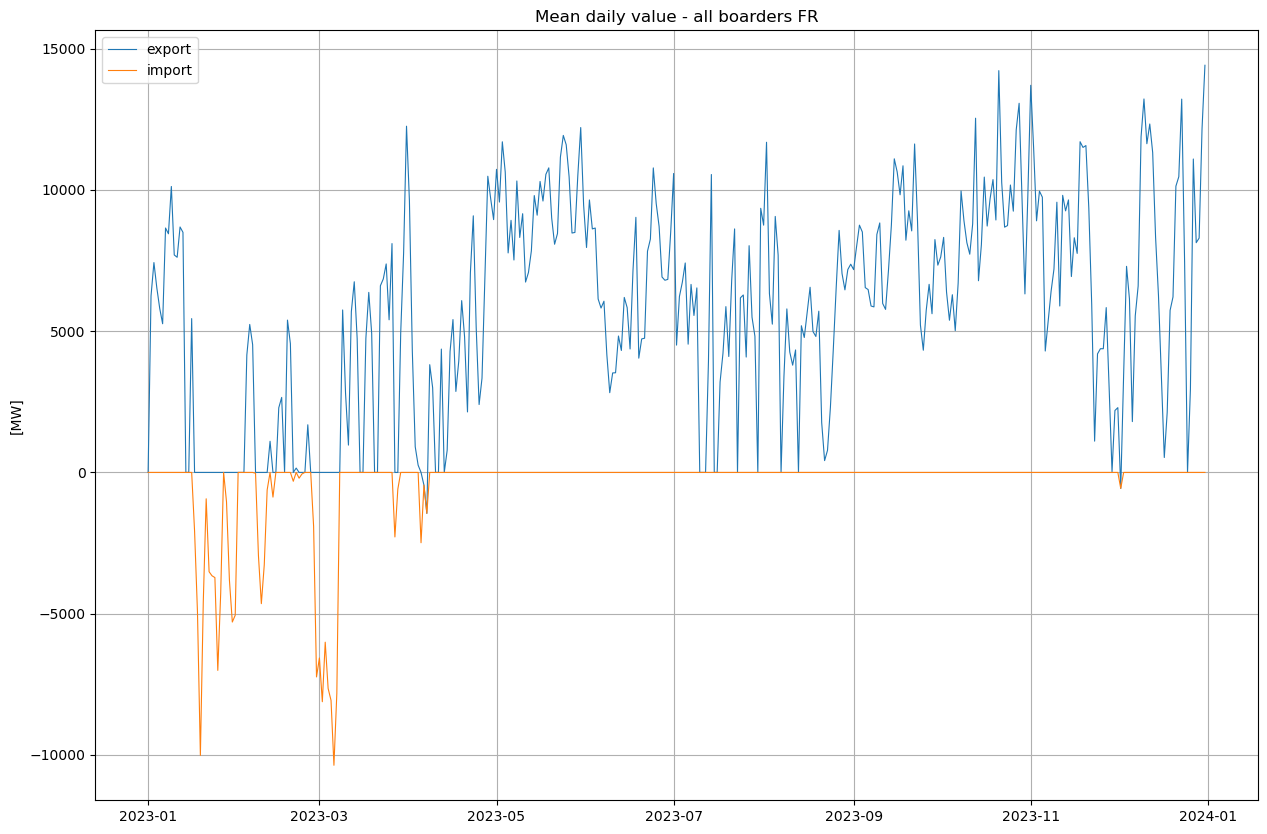

In [43]:
# Compare to https://analysesetdonnees.rte-france.com/en/markets/imports-exports
# Check: ES ok, BE+DE ko (prob import sous-évalués),  IT ko, CH ko, UK ok

sum_ImpExp_daily = raw_exported.sum(axis=1).resample('D').mean()-raw_imported.sum(axis=1).resample('D').mean()
sum_Exp_daily = sum_ImpExp_daily.copy()
sum_Exp_daily[sum_Imp_daily<0] = 0.
sum_Imp_daily = sum_ImpExp_daily.copy()
sum_Imp_daily[sum_Imp_daily>0] = 0.

fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
ax.set_title('Mean daily value - all boarders ' + country_traced)
#ax.plot(sum_ImpExp_daily, linewidth=0.4, label="import-export")
ax.plot(sum_Exp_daily , linewidth=0.8, label="export")
ax.plot(sum_Imp_daily , linewidth=0.8, label="import")
#ax[0].set_xlim(datetime.date(int(year),1,1),datetime.date(int(year),1,1))
ax.set_ylabel('[MW]')
#ax[0].set_ylim(0,1)
ax.legend()
ax.grid(True)

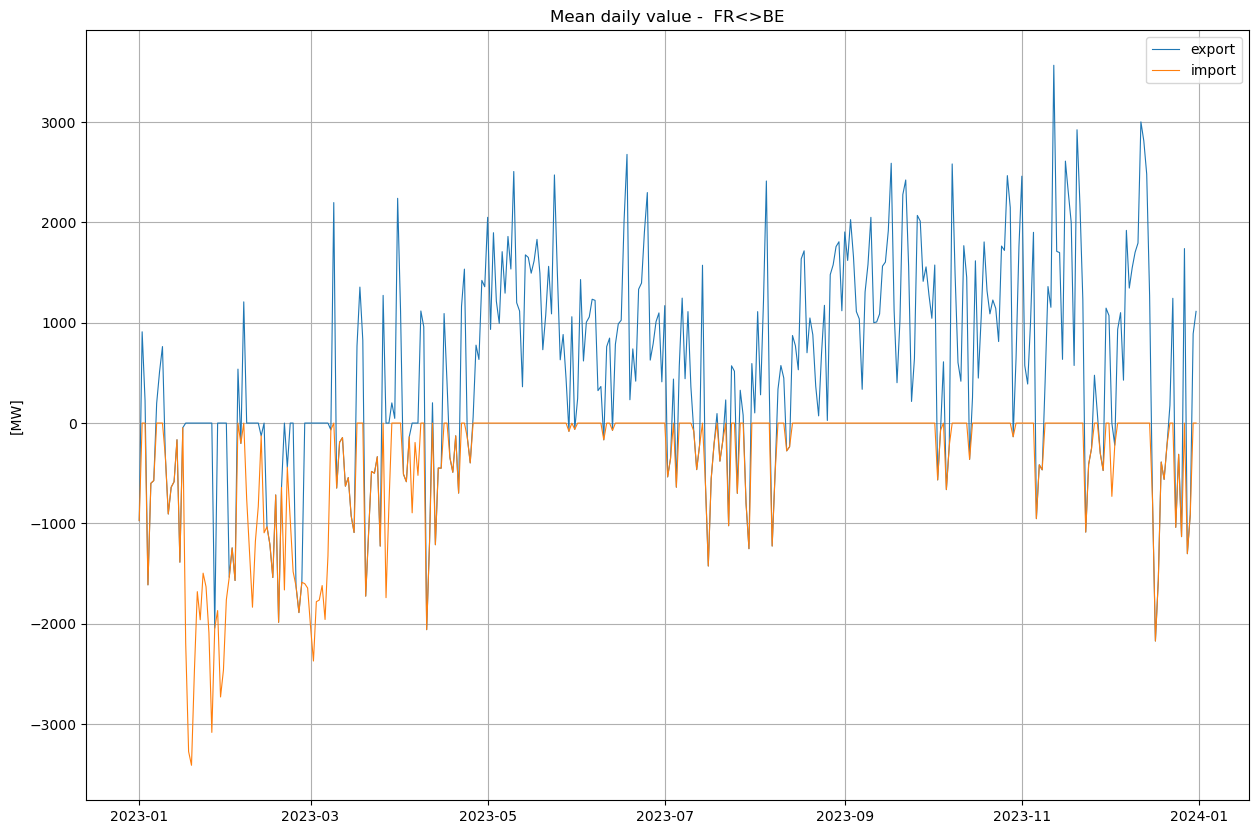

In [46]:
country_plot = 'BE'

sum_ImpExp_daily = raw_exported.loc[:,i+'>'+country_plot+' [MW]'].resample('D').mean()-raw_imported.loc[:,country_plot+'>'+i+' [MW]'].resample('D').mean()
sum_Exp_daily = sum_ImpExp_daily.copy()
sum_Exp_daily[sum_Imp_daily<0] = 0.
sum_Imp_daily = sum_ImpExp_daily.copy()
sum_Imp_daily[sum_Imp_daily>0] = 0.

fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
ax.set_title('Mean daily value -  ' + country_traced + "<>" + country_plot)
#ax.plot(sum_ImpExp_daily, linewidth=0.4, label="import-export")
ax.plot(sum_Exp_daily , linewidth=0.8, label="export")
ax.plot(sum_Imp_daily , linewidth=0.8, label="import")
#ax[0].set_xlim(datetime.date(int(year),1,1),datetime.date(int(year),1,1))
ax.set_ylabel('[MW]')
#ax[0].set_ylim(0,1)
ax.legend()
ax.grid(True)